In [1]:
# OpenOE_AC_map_v1_01, 06/30/15
#__version__=1.02
#__version__=1.03 # removing the initial gap (acquired when Open Ephys is initialized)
__version__=1.04 # 07/03/15, adding saving the averaged file into an hdf5-file
__version__=1.05 # fixing the averaging, AAC
__version__=1.06 # fixed variable initial TTL-triggered datapoints removal, zeroing time
__version__ # CSD added CSD analysis
__version__=1.07 # file output is now into the report directory
__version__=1.08 # batch analysis, one figure summary output
__version__=1.0801 #troubleshooting misalignment during averaging, single channel from d2_array seems fine.
__version__=1.0802 # creating summaries for all three columns of the 64ch shank
__version__=1.09 # 07/27/15 Sorting order of file_list is fixed, CSD working properly. everything is working
__version__=1.0901 # 07/29/15 true CSD
__version__=1.12 # 03/15/16 - added spectrogram, frequency analysis
__version__=1.13 # 04/08/16 - use seaborn for formatting for publication (larger fonts, despined)
__version__=1.14 # 07/29/16 - trying to remove trials with mouse movement from the final averaged LFP using 1500 uV threshold



initial_gap=7168 # this is now recalculated later in the code, as this is variable from trial-to-trial

probe='64DA'

if probe=='64DA':
    
     # 64D probe mapping, channels face me
        probe_map={47:0.00, 63:1.00, 17:2.00,
               46:0.01, 0:1.01, 18:2.01,
               45:0.02, 62:1.02, 19:2.02,
               44:0.03, 1:1.03, 20:2.03,
               43:0.04, 61:1.04, 21:2.04,
               42:0.05, 2:1.05, 22:2.05,
               41:0.06, 60:1.06, 23:2.06,
               40:0.07, 3:1.07, 24:2.07,
               39:0.08, 59:1.08, 25:2.08,
               38:0.09, 4:1.09, 26:2.09,
               37:0.10, 58:1.10, 27:2.10,
               36:0.11, 5:1.11, 28:2.11,
               35:0.12, 57:1.12, 29:2.12,
               34:0.13, 6:1.13, 30:2.13,
               33:0.14, 56:1.14, 31:2.14,
               32:0.15, 7:1.15, 16:2.15,
               48:0.16, 55:1.16, 15:2.16,
               49:0.17, 8:1.17, 14:2.17,
               50:0.18, 54:1.18, 13:2.18,
               51:0.19, 9:1.19, 12:2.19,
               52:0.20, 53:1.20, 11:2.20,
                        10:1.21
               }     


elif probe == '64DB':
    # 64D probe mapping, channels face monitor
        probe_map={16:0.00, 0:1.00, 46:2.00,
               17:0.01, 63:1.01, 45:2.01,
               18:0.02, 1:1.02, 44:2.02,
               19:0.03, 62:1.03, 43:2.03,
               20:0.04, 2:1.04, 42:2.04,
               21:0.05, 61:1.05, 41:2.05,
               22:0.06, 3:1.06, 40:2.06,
               23:0.07, 60:1.07, 39:2.07,
               24:0.08, 4:1.08, 38:2.08,
               25:0.09, 59:1.09, 37:2.09,
               26:0.10, 5:1.10, 36:2.10,
               27:0.11, 58:1.11, 35:2.11,
               28:0.12, 6:1.12, 34:2.12,
               29:0.13, 57:1.13, 33:2.13,
               30:0.14, 7:1.14, 32:2.14,
               31:0.15, 56:1.15, 47:2.15,
               15:0.16, 8:1.16, 48:2.16,
               14:0.17, 55:1.17, 49:2.17,
               13:0.18, 9:1.18, 50:2.18,
               12:0.19, 54:1.19, 51:2.19,
               11:0.20, 10:1.20, 52:2.20,
                        53:1.21
               }
        


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()

%load_ext autoreload
%autoreload 2

import scipy.signal as sg
sns.set_context("poster")
sns.set_style("ticks")
from collections import Counter
import Python3_OpenEphys_V14 as OE
import pandas as pd
from pandas import DataFrame
import numpy as np
import glob
import os
import re
import sys
import fnmatch

<Figure size 640x480 with 0 Axes>

In [3]:
# import seaborn as sns
import Python3_OpenOE_AC_map_functions_v1_08_30s as oem
# %matplotlib inline
import scipy
sns.set_context('poster')

load data

In [4]:
path=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise'
ls=[os.path.join(path, fd) for fd in os.listdir(path) if '.txt' not in fd]
ls1=[os.path.join(p,fd) for p in ls for fd in os.listdir(p) if '.txt' not in fd and '.npy' not in fd and '.png' not in fd]
files=[os.path.join(p,f) for p in ls1 for f in os.listdir(p)]
match = [f for f in files if '.npy' in f 
                             and 'broke' not in f 
                             and '.txt' not in f
                             #and not any(et in f for et in et_to_exclude)
        ]
match[:5]

['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy',
 'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy']

In [5]:
note=r'u:\Data\tang232\V1+LM\aligneddataall\BPnoise\et_to_exclude.txt'

text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)
match=[f for f in match if not any(et in f for et in et_to_exclude)]
for f in sorted(match[:10]):
    print (f.split('\\')[-1])


['ET#010_right_pre', 'ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post', 'ET#015_right_post']
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_002 BPnoise 10t_2022-01-24_12-58-50_100_2.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_0.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_1.npy
_01.24.2022_CC#084394_ET#073_right_post_6_0.03_003 BPnoise 10t_2022-01-24_13-26-28_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_0.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_1.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_003 BPnoise 10t_2022-01-25_13-21-15_100_2.npy
_01.24.2022_CC#084394_ET#074_right_post_6_0.03_004 BPnoise

In [6]:
## stim info, for ET#009 and ET#010
import os
movpath=r'u:\Visual Stimulation\Yu Visual Stim\BPnoise\0.2duration'
mov_names=[m for m in os.listdir(movpath) if 'mp4' in m]
print(sorted(mov_names))
order = [ 2,  7, 17, 18, 21,  6,  3,  1, 22, 14, 13, 12,  8,  0, 16, 23,  5,
15, 24, 20, 10, 19,  9, 11,  4]

['0.015_0.75_pinknoise.mp4', '0.015_1.5_pinknoise.mp4', '0.015_12_pinknoise.mp4', '0.015_3_pinknoise.mp4', '0.015_6_pinknoise.mp4', '0.03_0.75_pinknoise.mp4', '0.03_1.5_pinknoise.mp4', '0.03_12_pinknoise.mp4', '0.03_3_pinknoise.mp4', '0.03_6_pinknoise.mp4', '0.06_0.75_pinknoise.mp4', '0.06_1.5_pinknoise.mp4', '0.06_12_pinknoise.mp4', '0.06_3_pinknoise.mp4', '0.06_6_pinknoise.mp4', '0.12_0.75_pinknoise.mp4', '0.12_1.5_pinknoise.mp4', '0.12_12_pinknoise.mp4', '0.12_3_pinknoise.mp4', '0.12_6_pinknoise.mp4', '0.24_0.75_pinknoise.mp4', '0.24_1.5_pinknoise.mp4', '0.24_12_pinknoise.mp4', '0.24_3_pinknoise.mp4', '0.24_6_pinknoise.mp4']


In [7]:
ets=set([str('_'.join(p.split('\\')[-1].split('_')[3:5])) for p in match])
dur200 = [et for et in ets if int(et.split('_')[0][-2:])>=12]
dur200[:5]

['ET#017_right', 'ET#027_right', 'ET#020_left', 'ET#070_right', 'ET#063_left']

In [8]:
matchc=[]
for pp in set([i.split('\\')[-3] for i in match]):
    subf = [f for f in match if pp in f]
#     for et in set([i.split('\\')[-1].split('_')[3] for i in subf]):
    for et in set(dur200):
        subf1 = [f for f in subf if et in f]
        for rg in set([i.split('\\')[-2] for i in subf1]):
            subf2 = [f for f in subf1 if rg in f.split('\\')[-2]]
            for exprt in set([' '.join(i.split('\\')[-1].split('_')[6].split(' ')[1:]) for i in subf2]):
                subf3 = [f for f in subf2 if exprt in f]
                for sk in set([i.split('\\')[-1].split('_')[-1] for i in subf3]):
                    
                    subf4 = [f for f in subf3 if sk in f]
                    matchc.append(subf4)
matchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_2.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_1.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_001 BPnoise 10t_2020-01-16_11-37-36_100_0.npy',
  'u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\LM\\_01.14.2020_CC#067414_ET#017_right_pre_002 BPnoise 10t_2020-01-16_12-04-16_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\pre\\V1\\_01.14.2020_CC#067414_ET#017_right

In [9]:
onestimmactchs=glob.glob(path+'\*\*\onestim\*.npy')
# onestimmactchs[:5]
onestimmactchc=[]
dictionary={}
for x in onestimmactchs:  
    key = '_'.join(x.split('_')[:-5]) # The key is the first 16 characters of the file name
    group = dictionary.get(key,[])
    group.append(x)
    dictionary[key] = group
#     onestimmactchc.append(group)
for k in dictionary.keys():
    for shk in set([g.split('_')[-1] for g in dictionary[k]]):
        tmp=[x for x in dictionary[k] if x.endswith(shk)]
        onestimmactchc.append(tmp)
onestimmactchc

[['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#073_right_post_6_0.03_001 BPnoise trained 20t_2022-01-24_12-54-58_100_0.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_2.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_0.03_002 BPnoise trained 20t_2022-01-25_13-18-35_100_1.npy'],
 ['u:\\Data\\tang232\\V1+LM\\aligneddataall\\BPnoise\\post\\AL\\onestim\\_01.24.2022_CC#084394_ET#074_right_post_6_

In [10]:
order10= [ 8,  1,  8,  3,  4,  3, 20, 21, 11,  7,  8, 20, 24,  3, 19, 24, 23,
        0,  2, 11, 24, 16, 13, 20, 22, 10, 10, 22,  9,  2, 22, 22,  8, 24,
        2,  7, 14, 22, 23,  0,  1, 18, 12, 11, 23, 16, 13, 16, 12,  0, 14,
       11,  1, 16,  8, 15,  7, 12, 20,  5, 12,  7, 17, 23, 10,  4,  7, 17,
        1,  3, 23,  6, 16,  5,  0, 14,  1, 19, 17, 19,  5,  1,  2, 14,  5,
       24, 17, 19,  6, 14,  2,  8, 19,  6, 13, 14, 18,  9,  6, 17, 20,  7,
        6,  6,  9, 17, 22,  5,  9, 11,  8,  4,  3, 14,  0, 22, 11, 10,  0,
       23, 21, 12,  7, 17,  7,  6, 12, 19,  6, 21, 12,  1,  7, 12, 15, 23,
       19, 11, 19, 11,  3, 18, 10, 17, 15, 10, 13,  5, 18, 13, 13, 15, 20,
       21, 18, 20,  4,  9,  1, 10,  5, 19, 15,  2, 22, 22, 12, 21, 10,  4,
       16,  0,  5, 13, 12, 13, 18,  4,  0,  6,  1,  9,  2, 21, 16, 17, 14,
        4, 24, 14,  6,  3, 24, 16, 20,  5,  5,  2, 23,  9,  8, 17,  4, 19,
       23, 15, 10,  7, 13, 23,  2, 15, 24, 21,  9, 21, 20, 24, 11, 21, 16,
       21, 14,  2,  8, 22, 20, 24, 18, 15, 13, 16,  3,  8, 15, 15,  1,  9,
        3,  4, 18, 18, 10,  3, 18,  0,  0,  4, 11,  9]*3
bp10_ind=dict()
for o in set(order10):
    bp10_ind[o]=[index for (index, letter) in enumerate(order10) if letter == o]
bp10_ind

{0: [17,
  39,
  49,
  74,
  114,
  118,
  171,
  178,
  245,
  246,
  267,
  289,
  299,
  324,
  364,
  368,
  421,
  428,
  495,
  496,
  517,
  539,
  549,
  574,
  614,
  618,
  671,
  678,
  745,
  746],
 1: [1,
  40,
  52,
  68,
  76,
  81,
  131,
  158,
  180,
  236,
  251,
  290,
  302,
  318,
  326,
  331,
  381,
  408,
  430,
  486,
  501,
  540,
  552,
  568,
  576,
  581,
  631,
  658,
  680,
  736],
 2: [18,
  29,
  34,
  82,
  90,
  163,
  182,
  197,
  210,
  223,
  268,
  279,
  284,
  332,
  340,
  413,
  432,
  447,
  460,
  473,
  518,
  529,
  534,
  582,
  590,
  663,
  682,
  697,
  710,
  723],
 3: [3,
  5,
  13,
  69,
  112,
  140,
  191,
  232,
  238,
  243,
  253,
  255,
  263,
  319,
  362,
  390,
  441,
  482,
  488,
  493,
  503,
  505,
  513,
  569,
  612,
  640,
  691,
  732,
  738,
  743],
 4: [4,
  65,
  111,
  156,
  169,
  177,
  187,
  202,
  239,
  247,
  254,
  315,
  361,
  406,
  419,
  427,
  437,
  452,
  489,
  497,
  504,
  565,
  611,
  656

In [11]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056'
                     ,'ET#063','ET#064','ET#065','ET#066','ET#067'
                     ,'ET#068','ET#069','ET#031_r'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061'
                     ,'ET#070','ET#071','ET#072','ET#073','ET#074'],
              }

In [13]:
report_directory=r'U:\Data\tang232\V1+LM\report\dur200bpn/'

In [14]:
def unnesting(df, explode):
    idx = df.index.repeat(df[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
    df1.index = idx
    return df1.join(df.drop(explode, 1), how='left')

In [15]:
tmp=glob.glob(report_directory+'alllayer_all*.pkl')
tmp

['U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#012_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#013_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#014_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#016_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#016_right.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#017_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#017_right.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#019_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#019_right.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#020_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#020_right.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#021_left.pkl',
 'U:\\Data\\tang232\\V1+LM\\report\\dur200bpn\\alllayer_allET#021_right.

In [16]:
####locomotion
veldf = pd.read_pickle(r'U:\Data\tang232\V1+LM\report\dur200bpn\velocity_06.24.2023.pkl')
veldf['pre_post']=veldf.et.transform(lambda x:x.split('_')[-1])
veldf['et']=veldf.et.transform(lambda x:'_'.join(x.split('_')[:-1]))
veldf.head()

,et,exprt,cm/s,trial,loco,sf,tf,session,pre_post
0,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 2.5, 2.5, 0.0, 0.0, 0.0, ...",0,0,0.12,0.75,1,post
1,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.12,0.75,1,post
2,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,0.12,0.75,1,post
3,ET#065_right,BPnoise trained 20t,"[5.0, 2.5, 0.0, 0.0, -2.5, -2.5, 0.0, 2.5, 2.5...",3,0,0.12,0.75,1,post
4,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.12,0.75,1,post


In [16]:
tmp=glob.glob(report_directory+'all*_all*.pkl')
tmpls=[]
ct=len(tmp)
for f in tmp[:]:
    ct-=1
    tmpdf=pd.read_pickle(f)
#     break
    tmpls.append(tmpdf)
other_all=pd.concat(tmpls)
other_all.head()
other_all['exprt']=1
tmp=glob.glob(report_directory+'onestim_all*.pkl')
tmpls=[]
ct=len(tmp)
for f in tmp:
    ct-=1
    tmpdf=pd.read_pickle(f)
    tmpls.append(tmpdf)
onestim_all=pd.concat(tmpls)
onestim_all['exprt']=0

ls=[]
for n,g in onestim_all.groupby(['et','pre_post','region','sf','tf','shank']):
    print(n)
    if other_all.loc[(other_all.et==n[0])
                     &(other_all.pre_post==n[1])
                      &(other_all.region==n[2])
                      &(other_all.sf==float(n[3]))
                      &(other_all.tf==float(n[4]))
                      &(other_all.shank==n[5])].size:
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l4']=g.l4
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l23']=g.l23
        other_all.loc[(other_all.et==n[0])
                         &(other_all.pre_post==n[1])
                          &(other_all.region==n[2])
                          &(other_all.sf==float(n[3]))
                          &(other_all.tf==float(n[4]))
                          &(other_all.shank==n[5]),
                         'l56']=g.l56
    else:
        ls.append(g)
        print('append',n)
alllayer_all=pd.concat([other_all,pd.concat(ls)])
alllayer_all.head()

('ET#027_right', 'pre', 'LM', 0.12, 0.75, 0)
('ET#027_right', 'pre', 'LM', 0.12, 0.75, 1)
('ET#027_right', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 0)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 1)
('ET#028_left', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 0)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 1)
('ET#028_left', 'pre', 'V1', 0.12, 0.75, 2)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 0)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 1)
('ET#028_right', 'pre', 'LM', 0.12, 0.75, 2)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 0)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 1)
('ET#028_right', 'pre', 'V1', 0.12, 0.75, 2)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 0)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 1)
('ET#031_left', 'pre', 'AL', 0.12, 0.75, 2)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 0)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 1)
('ET#031_left', 'pre', 'V1', 0.12, 0.75, 2)
('ET#031_right', 'post', 'AL', 0.12, 0.75, 0)
append ('ET#031_right

('ET#068_left', 'post', 'V1', 0.12, 0.75, 2)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 0)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 1)
('ET#069_left', 'post', 'AL', 0.12, 0.75, 2)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 0)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 1)
('ET#069_left', 'post', 'V1', 0.12, 0.75, 2)
('ET#069_right', 'post', 'AL', 0.12, 0.75, 0)
('ET#069_right', 'post', 'AL', 0.12, 0.75, 1)
('ET#069_right', 'post', 'AL', 0.12, 0.75, 2)
('ET#069_right', 'post', 'V1', 0.12, 0.75, 0)
('ET#069_right', 'post', 'V1', 0.12, 0.75, 1)
('ET#069_right', 'post', 'V1', 0.12, 0.75, 2)
('ET#070_left', 'post', 'LM', 0.03, 6.0, 0)
('ET#070_left', 'post', 'LM', 0.03, 6.0, 1)
('ET#070_left', 'post', 'LM', 0.03, 6.0, 2)
('ET#070_left', 'post', 'V1', 0.03, 6.0, 0)
('ET#070_left', 'post', 'V1', 0.03, 6.0, 1)
('ET#070_left', 'post', 'V1', 0.03, 6.0, 2)
('ET#070_right', 'post', 'AL', 0.03, 6.0, 0)
('ET#070_right', 'post', 'AL', 0.03, 6.0, 1)
('ET#070_right', 'post', 'AL', 0.03, 6.0, 2)
('ET#070_r

,et,pre_post,region,l4,l23,l56,sf,tf,shank,exprt
0,ET#012_left,pre,LM,"[[[80, 169, 139, 119, 65, 44, 43, 20, -5, -23,...","[[[72, 181, 163, 140, 106, 97, 85, 86, 81, 75,...","[[[94, 191, 189, 159, 114, 103, 86, 76, 56, 62...",0.015,0.75,2,1
0,ET#012_left,pre,LM,"[[[-33, -56, -52, -89, -78, -105, -101, -104, ...","[[[19, 57, 72, 36, 27, 7, 28, 23, 22, 20, 39, ...","[[[-42, -87, -74, -105, -87, -124, -151, -134,...",0.015,1.50,2,1
0,ET#012_left,pre,LM,"[[[-2, 5, 11, 11, 29, 21, 17, 11, -22, -57, -9...","[[[-47, -100, -86, -86, -81, -85, -85, -101, -...","[[[8, 22, 22, 36, 20, 14, -2, -35, -63, -95, -...",0.015,12.00,2,1
0,ET#012_left,pre,LM,"[[[-37, -81, -62, -56, -24, -32, -19, 0, -7, 1...","[[[15, 45, 74, 111, 154, 189, 184, 220, 208, 1...","[[[-33, -75, -54, -28, 9, 40, 29, 34, 35, 56, ...",0.015,3.00,2,1
0,ET#012_left,pre,LM,"[[[-63, -122, -111, -113, -100, -104, -94, -10...","[[[-259, -534, -452, -491, -444, -458, -427, -...","[[[-54, -97, -64, -77, -56, -52, -31, -39, 2, ...",0.015,6.00,2,1


In [17]:
rec_to_exclude=['ET#012_right_post', 'ET#013_right_post', 'ET#014_right_post',
       'ET#015_right_post']

In [18]:
training_stim={'LM':['ET#051','ET#052','ET#054','ET#055','ET#056','ET#063','ET#064'
                    ,'ET#065','ET#066','ET#067','ET#068','ET#069','ET#031_r'
                    ],
               'AL':['ET#057','ET#058','ET#059','ET#060','ET#061','ET#070','ET#071'
                     ,'ET#072','ET#073','ET#074',],
              }

In [19]:
from detect_peaks import detect_peaks

In [36]:
veldf['prestimvel']=veldf['cm/s'].apply(lambda x:np.nanmean(abs(x[0:20])))
veldf['stimvel']=veldf['cm/s'].apply(lambda x:np.nanmean(abs(x[20:40])))
# veldf
veldf.head()

,et,exprt,cm/s,trial,loco,sf,tf,session,pre_post,prestimvel,stimvel
0,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 2.5, 2.5, 0.0, 0.0, 0.0, ...",0,0,0.12,0.75,1,post,0.500,0.75
1,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0.12,0.75,1,post,0.000,0.00
2,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0,0.12,0.75,1,post,0.750,0.50
3,ET#065_right,BPnoise trained 20t,"[5.0, 2.5, 0.0, 0.0, -2.5, -2.5, 0.0, 2.5, 2.5...",3,0,0.12,0.75,1,post,0.875,0.00
4,ET#065_right,BPnoise trained 20t,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,0,0.12,0.75,1,post,0.000,0.00


In [21]:
prestimvel=veldf.groupby(['et','pre_post','sf','tf']
             ).apply(lambda x:x.prestimvel.values).to_frame('prestimvel').reset_index()
stimvel=veldf.groupby(['et','pre_post','sf','tf']
             ).apply(lambda x:x.prestimvel.values).to_frame('stimvel').reset_index()

pre 25 post 17
('ET#012_left', 'pre', 0.03, 6.0)
('ET#013_left', 'pre', 0.03, 6.0)
('ET#014_left', 'pre', 0.03, 6.0)
('ET#016_left', 'pre', 0.03, 6.0)
('ET#016_right', 'pre', 0.03, 6.0)
('ET#017_left', 'pre', 0.03, 6.0)
('ET#017_right', 'pre', 0.03, 6.0)
('ET#019_left', 'pre', 0.03, 6.0)
('ET#019_right', 'pre', 0.03, 6.0)
('ET#020_left', 'pre', 0.03, 6.0)
('ET#020_right', 'pre', 0.03, 6.0)
('ET#021_left', 'pre', 0.03, 6.0)
('ET#021_right', 'pre', 0.03, 6.0)
('ET#023_left', 'pre', 0.03, 6.0)
('ET#023_right', 'pre', 0.03, 6.0)
('ET#024_left', 'pre', 0.03, 6.0)
('ET#024_right', 'pre', 0.03, 6.0)
('ET#025_left', 'pre', 0.03, 6.0)
('ET#025_right', 'pre', 0.03, 6.0)
('ET#026_right', 'pre', 0.03, 6.0)
('ET#027_right', 'pre', 0.03, 6.0)
('ET#028_left', 'pre', 0.03, 6.0)
('ET#028_right', 'pre', 0.03, 6.0)
('ET#031_left', 'pre', 0.03, 6.0)
('ET#032_left', 'pre', 0.03, 6.0)
('ET#057_left', 'post', 0.03, 6.0)
('ET#057_right', 'post', 0.03, 6.0)
('ET#058_left', 'post', 0.03, 6.0)
('ET#058_right', '

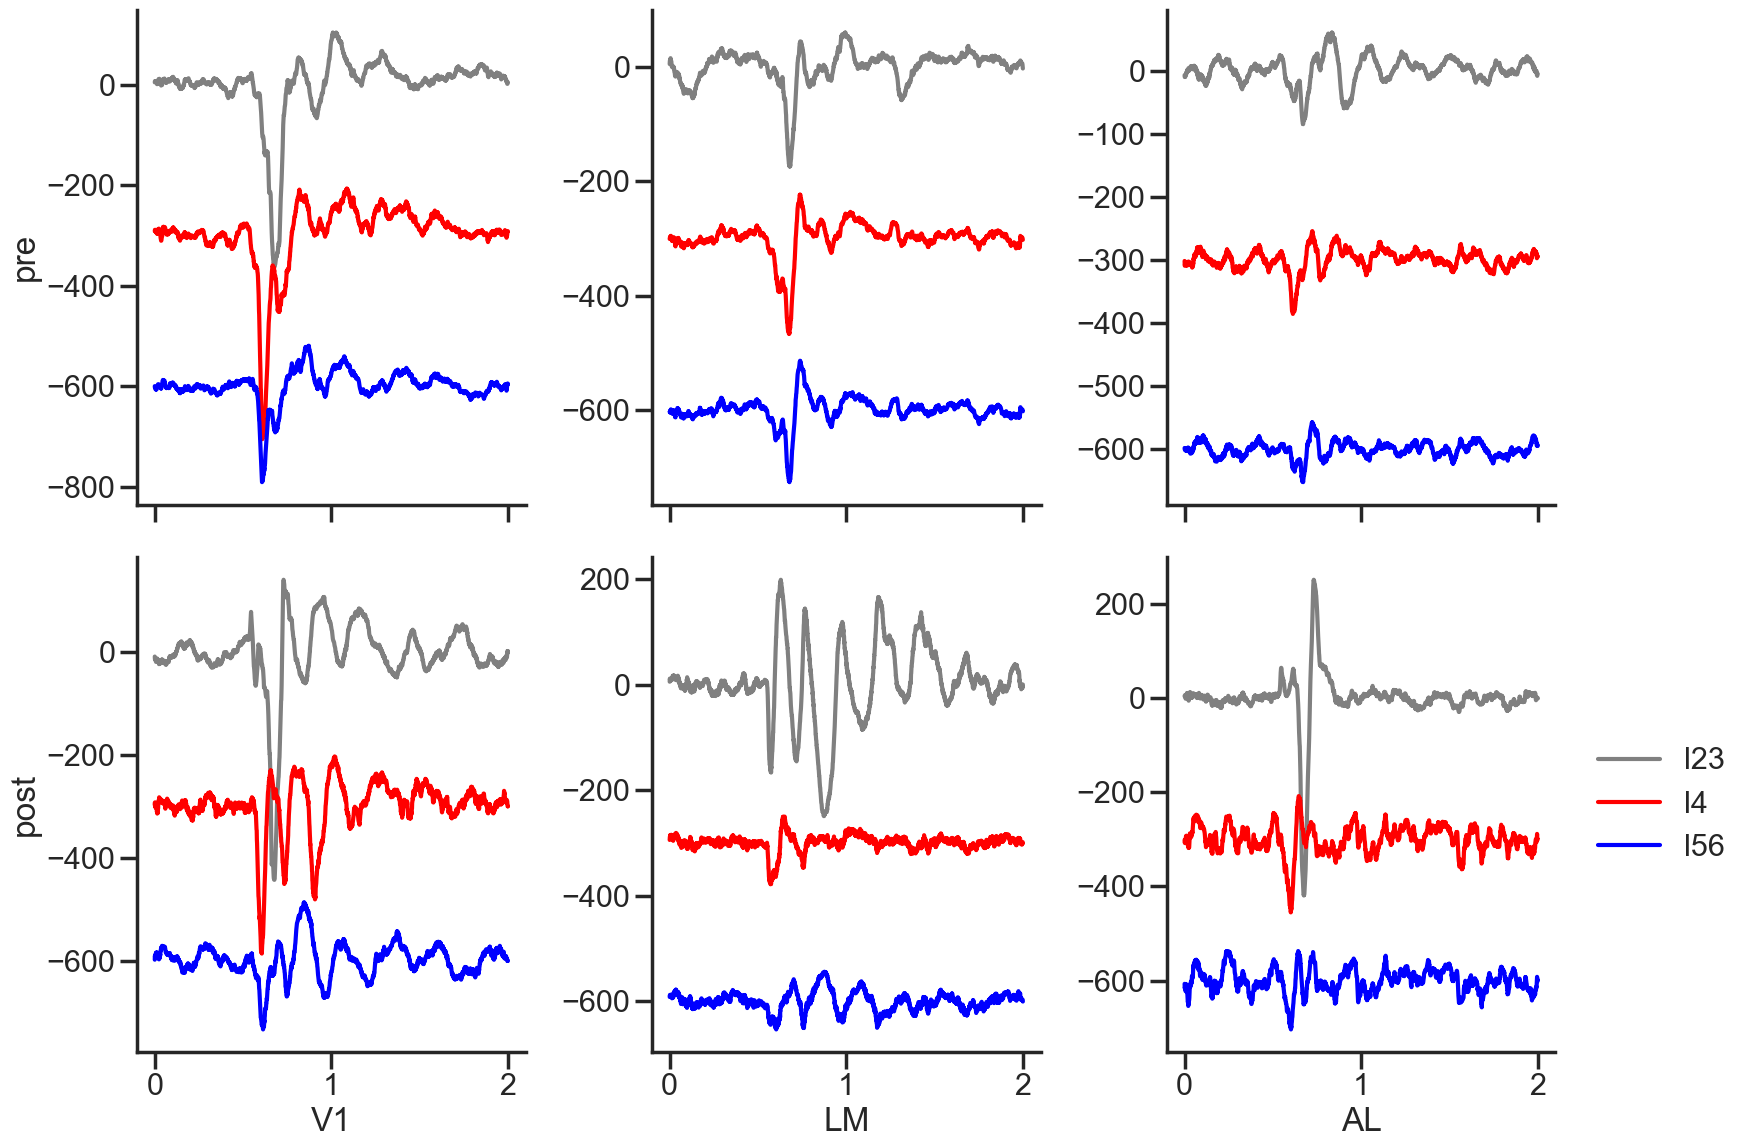

In [37]:
times=np.linspace(0,2.0,2000)

## stim time window
a,b = 0.5,0.7
# sns.set_context('poster')
ALparam=6,0.03
LMparam=0.75,0.12
param_r=ALparam
alllayer_all.sort_values(['region','pre_post'],inplace=True, ascending=True)
f,ax=plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=False)

# rg='LM'
tmp=alllayer_all[                 
                 (~alllayer_all.et.str.contains('|'.join(training_stim['LM'])))
                 &(alllayer_all.tf==param_r[0])
                 &(alllayer_all.sf==param_r[1])
                 &(~alllayer_all.et.str.contains('|'.join(['67','68','61']))) ## pvcrechr2 mice
           ]
print('pre',len(tmp[tmp.pre_post=='pre'].et.unique()),
     'post',len(tmp[tmp.pre_post=='post'].et.unique())
     )

ls=[]
for n,g in tmp.groupby(['et','pre_post','sf','tf']):
    print(n)
    if veldf[(veldf.et.str.contains(n[0]))].shape[0]:
        prestimvel=veldf[(veldf.et.str.contains(n[0]))
                        &(veldf.pre_post.str.contains(n[1]))
                         &(veldf.sf==n[2])
                         &(veldf.tf==n[3])
                        ].prestimvel.values
        stimvel=veldf[(veldf.et.str.contains(n[0]))
                        &(veldf.pre_post.str.contains(n[1]))
                         &(veldf.sf==n[2])
                         &(veldf.tf==n[3])
                        ].stimvel.values
        loco=(prestimvel[:20]>=0.5)
        nonloco=(prestimvel[:20]<0.5)
#     if 
#     break
        g1=g.copy()
        g1.l4=g1.l4.apply(lambda x:x[:,:20,:][:,loco,:])
        g1.l23=g1.l23.apply(lambda x:x[:,:20,:][:,loco,:])
        g1.l56=g1.l56.apply(lambda x:x[:,:20,:][:,loco,:])
        g1['loco']=1

        g2=g.copy()
        g2.l4=g2.l4.apply(lambda x:x[:,:20,:][:,nonloco,:])
        g2.l23=g2.l23.apply(lambda x:x[:,:20,:][:,nonloco,:])
        g2.l56=g2.l56.apply(lambda x:x[:,:20,:][:,nonloco,:])
        g2['loco']=0
    
    ls.extend([g1,g2])
tmp=pd.concat(ls)
tmp=tmp[tmp.loco==0]

for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)]
#         break
        lfp23=[i for i in tmp2.l23.values if len(i)!=0]
        lfp4=[i for i in tmp2.l4.values if len(i)!=0]
        lfp56=[i for i in tmp2.l56.values if len(i)!=0]
        
        
       
        l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
        l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp4])
       
        l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp56])
        
        print(pp,rg,l23.shape, l4.shape,l56.shape)
        
        avglfp23=np.nanmean(l23,axis=0)
        avglfp4=np.nanmean(l4,axis=0)
        avglfp56=np.nanmean(l56,axis=0)
        

        ax[ix][i].plot(times,avglfp23, 'gray',label='l23')
        ax[ix][i].plot(times,avglfp4-300, 'red',label='l4')
        ax[ix][i].plot(times,avglfp56-300*2, 'blue',label='l56')

        ax[ix][i].legend('',frameon=False)
        ax[-1][i].set_xlabel(rg)
        sns.despine()
    ax[ix][0].set_ylabel(str(pp))
ax[-1][-1].legend(loc='center left', bbox_to_anchor=(1.04, 0.5), ncol=1,frameon=False)  
  
plt.tight_layout()
# plt.show()
 
# report_directory= r'u:\Data\tang232\LMArch_V1Rec\Report\9.6.2018/'
name = ''

# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP_minamp_nonloco.pdf', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP_minamp_nonloco.png', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')




In [28]:
dfls=[]
for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)
                  &(~tmp1.et.str.contains('|'.join(['67','68','61'])))
                 ]
        lfp23=[i for i in tmp2.l23.values if len(i)!=0]
        lfp4=[i for i in tmp2.l4.values if len(i)!=0]
        lfp56=[i for i in tmp2.l56.values if len(i)!=0]

       
        l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
        l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp4])
       
        l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp56])
        
        
        tmpls=[l23,l4,l56]
        for ii,l in enumerate(tmpls):
            peaks=[detect_peaks((ll[500:1500]),mph=50,mpd=50,valley=True) for ll in l]
#             veps=np.array([np.median((ll[500:1500])[peak]) for peak,ll in list(zip(peaks,l))])
            peak4=[(peak[(peak>0)&(peak<200)],peak[(peak>200)&(peak<400)]
                    ,peak[(peak>400)&(peak<600)]
                    ,peak[(peak>600)&(peak<800)],peak[(peak>800)&(peak<1000)]) 
                   for peak in peaks]
            peaks2=[detect_peaks((ll[500:1500]),mph=30,mpd=50,valley=False) for ll in l]
#             veps2=np.array([np.median((ll[500:1500])[peak]) for peak,ll in list(zip(peaks2,l))])
            peak42=[(peak[(peak>0)&(peak<200)],peak[(peak>200)&(peak<400)]
                    ,peak[(peak>400)&(peak<600)]
                    ,peak[(peak>600)&(peak<800)],peak[(peak>800)&(peak<1000)]) 
                   for peak in peaks2]
            ls=[]
            for peak,peak2,ll in list(zip(peak4,peak42,l)):
                veps=[]
                for j,p in enumerate(list(zip(peak,peak2))):
                    if len(p[0]) and len(p[1]):
                        veps.append((ll[500:1500])[p[0]].min()-(ll[500:1500])[p[1]].max())
                    else:
                        veps.append((ll[500:1500])[j*200:(j+1)*200].min())
                veps=np.array(veps)
                ls.append(veps)
            veps=[np.min(vep) for vep in ls]
            vepdf=pd.DataFrame({'vep':veps
                                 ,'rec':np.arange(len(veps))
                                 ,'region':rg
                                 ,'pre_post':pp
                                 ,'ly':ii
                                 })
            dfls.append(vepdf)
vepdf=pd.concat(dfls)
vepdf.head()
            


,vep,rec,region,pre_post,ly
0,-424.571429,0,V1,pre,0
1,-275.285714,1,V1,pre,0
2,-282.071429,2,V1,pre,0
3,-215.850000,3,V1,pre,0
4,-167.050000,4,V1,pre,0


In [29]:
import pingouin as pg

In [30]:
ls=[]
for n,g in vepdf.groupby(['region','ly']):
    stat=pg.mwu(g[g.pre_post=='pre'].vep,g[g.pre_post=='post'].vep)
    stat['region']=n[0]
    stat['ly']=n[1]
    stat['prenrec']=g[g.pre_post=='pre'].rec.nunique()
    stat['postnrec']=g[g.pre_post=='post'].rec.nunique()
    ls.append(stat)
statdf=pd.concat(ls)
ls=[]
for n,g in statdf.groupby(['region']):
    g['pcorr']=pg.multicomp(g['p-val'].values,method='fdr_bh')[-1]
    ls.append(g)
statdf=pd.concat(ls)
statdf

,U-val,alternative,p-val,RBC,CLES,region,ly,prenrec,postnrec,pcorr
MWU,1134.0,two-sided,2.698472e-08,-0.762238,0.881119,AL,0,33,39,8.095416e-08
MWU,967.0,two-sided,2.473093e-04,-0.502720,0.751360,AL,1,33,39,3.709640e-04
MWU,947.0,two-sided,5.858255e-04,-0.471639,0.735820,AL,2,33,39,5.858255e-04
MWU,375.0,two-sided,1.099023e-01,-0.302083,0.651042,LM,0,48,12,1.737642e-01
MWU,215.0,two-sided,1.802797e-01,0.253472,0.373264,LM,1,48,12,1.802797e-01
MWU,198.0,two-sided,1.158428e-01,0.297872,0.351064,LM,2,47,12,1.737642e-01
MWU,1639.0,two-sided,2.543547e-01,-0.127623,0.563811,V1,0,57,51,2.543547e-01
MWU,1043.0,two-sided,1.153292e-02,0.282422,0.358789,V1,1,57,51,3.153924e-02
MWU,1058.0,two-sided,2.102616e-02,0.259104,0.370448,V1,2,56,51,3.153924e-02


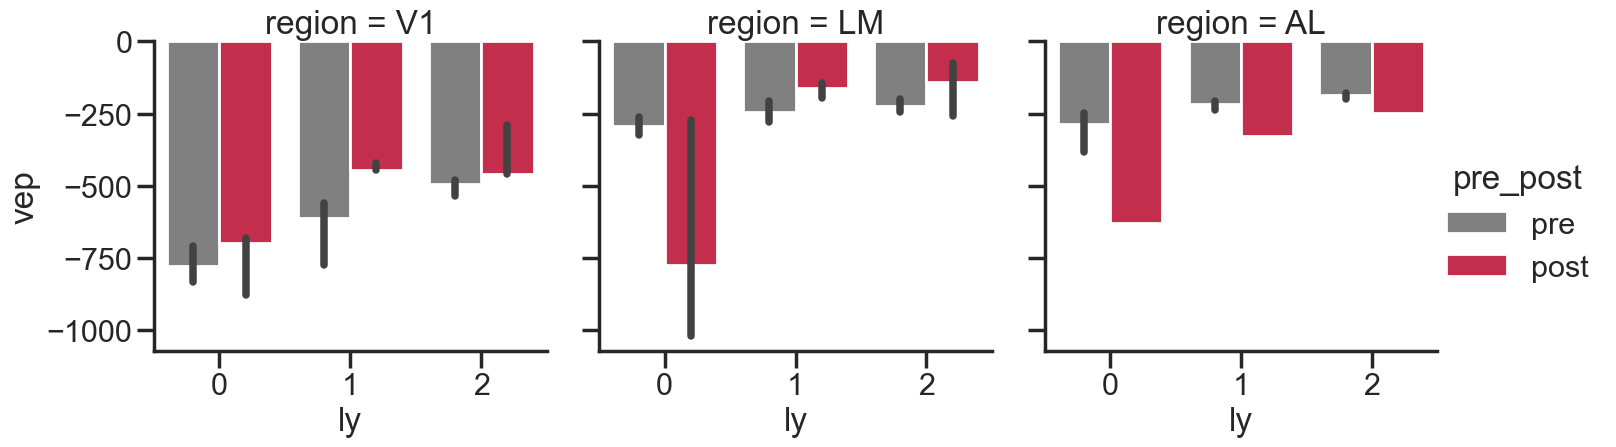

In [31]:
sns.catplot(x='ly',y='vep',data=vepdf
           ,hue='pre_post'
            ,col='region',col_order=['V1','LM','AL']
            ,kind='bar',estimator=np.median,ci=68,
           )
# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP500-1500medianvep_minlfp.pdf', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')
# plt.savefig(report_directory+name+'infigure1v0.5/ALtraining_LFP500-1500medianvep_minlfp.png', transparent=True)#, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [32]:
### separate 1/f component
import mne

In [465]:
# f,ax=plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=False)

# rg='LM'
tmp=alllayer_all[
                 (~alllayer_all.et.str.contains('|'.join(rec_to_exclude)))
                 &(~alllayer_all.et.str.contains('|'.join(training_stim['LM'])))
#                 &(~alllayer_all.et.str.contains('|'.join(['67','68','61']))) pvcrechr2 mice
#                  &(alllayer_all.tf==param_r[0])
#                  &(alllayer_all.sf==param_r[1])
#             &(ms_ph.pre_post.str.contains('post'))
           ]
print('pre',len(tmp[tmp.pre_post=='pre'].et.unique()),
     'post',len(tmp[tmp.pre_post=='post'].et.unique())
     )

ls=[]
for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
        tmp2=tmp1[(tmp1.region==rg)
#                   &(~tmp1.et.str.contains('|'.join(['67','68','61'
# #                                                     ,'75','76'
#                                                    ])))
                 ]
        for n,g in tmp2.groupby(['tf','sf']):
            lfp23=[i for i in g.l23.values if len(i)!=0]
            lfp4=[i for i in g.l4.values if len(i)!=0]
            lfp56=[i for i in g.l56.values if len(i)!=0]

            
            l23=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                        ].mean(axis=0) for l in lfp23])
        
            l4=np.stack([l[l.mean(axis=1)[:,550:650].min(axis=1).argmin()
                                            ].mean(axis=0) for l in lfp4])

            l56=np.stack([l[l.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                                            ].mean(axis=0) for l in lfp56])

            tmpls=[l23,l4,l56]
            fls=[]
            pspecls=[]
            for x,i in enumerate(tmpls):
                for y,ii in enumerate(i):
                    f,pspec = scipy.signal.welch(ii[500:1200], fs=1000., window='hanning'
                                          , nperseg=700.
                                          , noverlap=700./4
    #                                       , nfft=None
    #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
                    tmpdf=pd.DataFrame({'tf':n[0],
                                        'sf':n[1],
                                        'pre_post':pp,
                                        'region':rg,
                                        'frex':f,
                                        'ly':x,
                                        'dB':10*np.log(pspec),
                                        'rec':y,
#                                         'pspec':pspec
                                       })
                    ls.append(tmpdf)
pspecdf=pd.concat(ls)
pspecdf.head()

pre 25 post 23


,tf,sf,pre_post,region,frex,ly,dB,rec
0,0.75,0.015,pre,V1,0.000000,0,60.971883,0
1,0.75,0.015,pre,V1,1.428571,0,80.788709,0
2,0.75,0.015,pre,V1,2.857143,0,75.208790,0
3,0.75,0.015,pre,V1,4.285714,0,71.238333,0
4,0.75,0.015,pre,V1,5.714286,0,62.942786,0


In [468]:
# tmp2.head()

In [379]:
ls=[]
value='dB'
for n,g in pspecdf.groupby(['pre_post','region','ly']):
    theta=g[g.frex.between(4,8)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    theta['frex']='4-8'
    alpha=g[g.frex.between(8,12)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    alpha['frex']='8-12'
    beta=g[g.frex.between(12,30)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    beta['frex']='12-30'
    lowgamma=g[g.frex.between(30,50)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    lowgamma['frex']='30-50'
    highgamma=g[g.frex.between(50,80)].groupby(['pre_post','region','ly','rec','tf','sf'])[value].median().to_frame('dB').reset_index()
    highgamma['frex']='50-80'
    ls.append(pd.concat([theta,alpha,beta,lowgamma,highgamma]))
tmpdf=pd.concat(ls)
tmpdf.head()

,pre_post,region,ly,rec,tf,sf,dB,frex
0,post,AL,0,0,0.75,0.015,60.529356,4-8
1,post,AL,0,0,0.75,0.030,60.633156,4-8
2,post,AL,0,0,0.75,0.060,64.161253,4-8
3,post,AL,0,0,0.75,0.120,38.456135,4-8
4,post,AL,0,0,0.75,0.240,53.389776,4-8


In [380]:
rgheats={'V1':'gray_r','LM':'Reds','AL':'Blues'}

In [381]:
# report_directory
param_r=ALparam

meta NOT subset; don't know how to subset; dropped


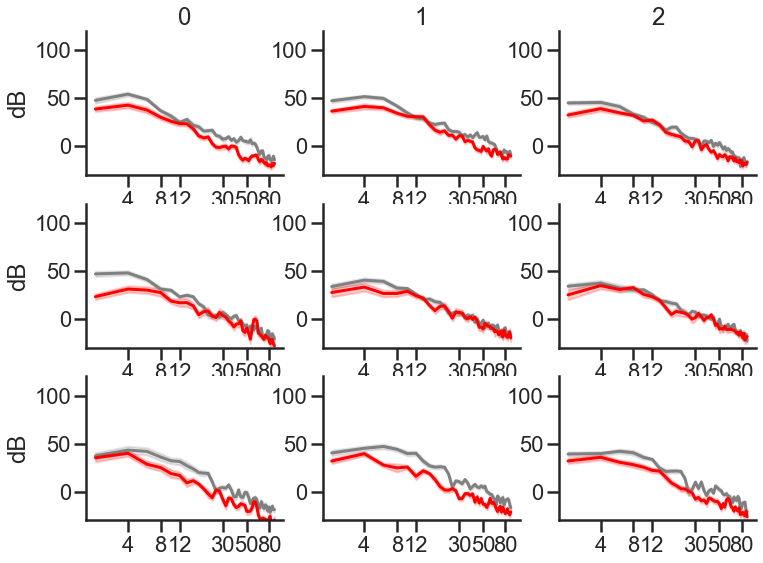

In [385]:
f,ax=plt.subplots(3,3,figsize=(12,9))
# ax.set(xscale="log")

for i,rg in enumerate(['V1','LM','AL']):
    tm1=pspecdf[pspecdf.region==rg]
    for ii,ly in enumerate([0,1,2]):
        tm2=tm1[tm1.ly==ly]
        tmp=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.mean().to_frame('dB').reset_index()
        tmpsem=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.sem().to_frame('sem').reset_index()
        ax[i][ii].plot(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB,color='gray')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB-tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,tmp[tmp.pre_post=='pre'].dB+tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,color='gray',alpha=0.2)
        ax[i][ii].plot(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB,color='red')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB-tmpsem[tmpsem.pre_post=='post']['sem']
                         ,tmp[tmp.pre_post=='post'].dB+tmpsem[tmpsem.pre_post=='post']['sem']
                         ,color='red',alpha=0.2)
#         ax[i][ii].set_xlim(0.5,30)
        ax[i][ii].set_ylim(-30,120)
        ax[i][ii].set(xscale="log")
        ax[i][ii].minorticks_off()
        ax[i][ii].set_xticks([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xticklabels([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xlabel('')
        ax[i][ii].set_ylabel('')
        ax[0][ii].set_title(ly)
        ax[i][ii].legend('',frameon=False)
        
#         ax[i][ii].set_xlabel('')
    ax[i][0].set_ylabel('dB')
#     ax[i][0].text(-10,10,rg)
    

sns.despine()
# f.gca().set_xscale('log')

# plt.savefig(report_directory+'tf/ALtraining_freq0-500welchdB_ALparams.png')
# plt.savefig(report_directory+'tf/ALtraining_freq0-500welchdB_ALparams.pdf')

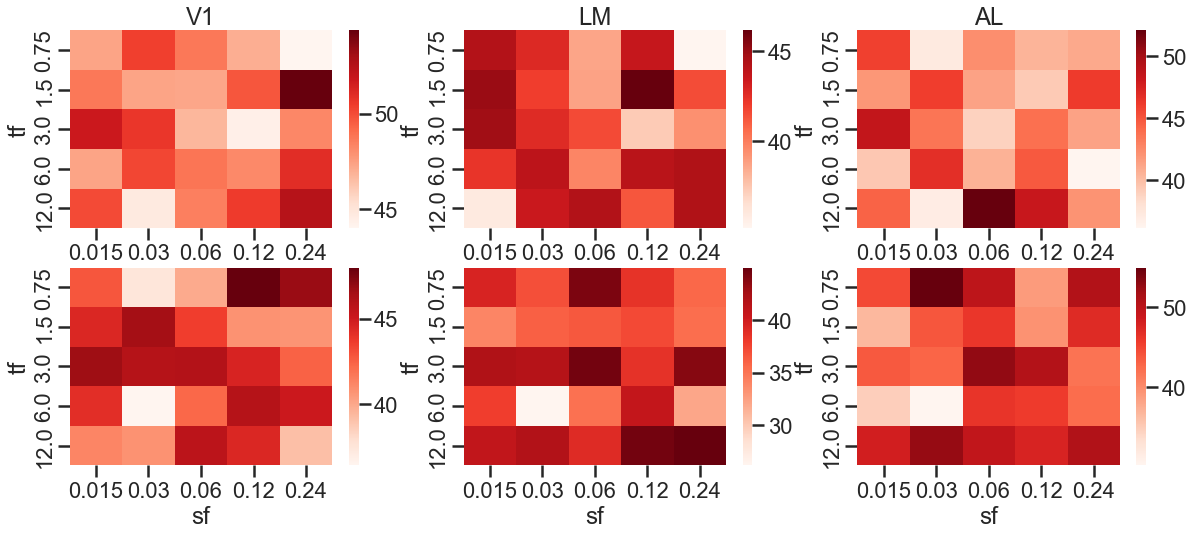

In [383]:
# from matplotlib.colors import LogNorm, Normalize
from matplotlib.colors import LogNorm, Normalize
class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))

# im2 = ax2.pcolormesh(x,y,z, cmap="RdBu_r", 
#                             norm=MidPointLogNorm(vmin=z.min(), vmax=z.max(), midpoint=1))
# f,ax=plt.subplots(2,3,figsize=(15,8))
test=tmpdf[(tmpdf.frex=='4-8')
#            &(tmpdf.pre_post=='pre')
          ]
ls=[]
for n,g in test.groupby(['rec','ly','region','pre_post']):
# for n,g in test.groupby(['rec','ly','region',]):
#     g['dB']=(g.dB-g.dB.min())/(g.dB.max()-g.dB.min())
#     g['dB']=scipy.stats.zscore(g.dB)
    g['dB']=g.dB#/g.dB.max()
#     if g.sf.nunique()==5:
    ls.append(g)
test=pd.concat(ls)
test.head()

f,ax=plt.subplots(2,3,figsize=(20,8))
for i,rg in enumerate(['V1','LM','AL']):
    hm1=test[(test.region==rg)
            &(test.ly==0)
            &(test.pre_post=='pre')
           ].groupby(['tf','sf','pre_post']).median().reset_index().pivot('tf','sf','dB')
    hm2=test[(test.region==rg)
            &(test.ly==0)
            &(test.pre_post=='post')
           ].groupby(['tf','sf','pre_post']).median().reset_index().pivot('tf','sf','dB')
#     hm=test[(test.region==rg)
#             &(test.ly==0)
#            ].groupby(['tf','sf','pre_post']).median().groupby(level=[0,1]
#                                                              ).apply(lambda x:x.dB.iloc[0]/x.dB.iloc[1]
#                                                                     ).to_frame('dB').reset_index().pivot('tf','sf','dB')
#     sns.heatmap(hm,ax=ax[i]
# #                 ,cmap=rgheats[rg]
#                 ,cmap='RdBu_r'
# #                 ,norm=MidPointLogNorm(vmin=hm.min().min(), vmax=hm.max().max(), midpoint=1)
#                 ,vmin=0.6, vmax=1.2
#                 ,center=1
#                )
#     ax[i].set_title(rg)
    sns.heatmap(hm1,ax=ax[0][i],cmap=rgheats['LM']
#                 ,norm=LogNorm(60,100)
#                 ,vmin=30, vmax=60
               )
    sns.heatmap(hm2,ax=ax[1][i],cmap=rgheats['LM']
#                 ,norm=LogNorm(60,100)
#                 ,vmin=30, vmax=60
               )
    ax[0][i].set_title(rg)
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdBprepost_tfsf_loco.png')
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdBprepost_tfsf_loco.pdf')

In [386]:
import pingouin as pg
param_r=ALparam
ls=[]
for n,g in tmpdf[(tmpdf.tf==param_r[0])
                &(tmpdf.sf==param_r[1])
                ].groupby(['region','ly']):
    print(n)
    tmpls=[]
    for nn,gg in g.groupby('frex'):
        stat=pg.mwu(gg[gg.pre_post=='pre'].dB, gg[gg.pre_post=='post'].dB)
        stat['region']=n[0]
        stat['ly']=n[1]
        stat['frex']=nn
        stat['prenrec']=gg[gg.pre_post=='pre'].rec.nunique()
        stat['postnrec']=gg[gg.pre_post=='post'].rec.nunique()
        tmpls.append(stat)
    stats=pd.concat(tmpls)
    stats['pvals_corr'] = pg.multicomp(stats['p-val'].values, method='fdr_bh')[-1]
    ls.append(stats)
statdf=pd.concat(ls)
# statdf.to_csv(report_directory+'tf/ALtraining_freq0-500welchdB_stats_ALparams.csv')
statdf

('AL', 0)
('AL', 1)
('AL', 2)
('LM', 0)
('LM', 1)
('LM', 2)
('V1', 0)
('V1', 1)
('V1', 2)


,U-val,alternative,p-val,RBC,CLES,region,ly,frex,prenrec,postnrec,pvals_corr
MWU,887.0,two-sided,4.419846e-04,-0.493266,0.746633,AL,0,12-30,36,33,7.366410e-04
MWU,950.0,two-sided,1.950846e-05,-0.599327,0.799663,AL,0,30-50,36,33,4.877114e-05
MWU,804.0,two-sided,1.184870e-02,-0.353535,0.676768,AL,0,4-8,36,33,1.184870e-02
MWU,979.0,two-sided,3.859544e-06,-0.648148,0.824074,AL,0,50-80,36,33,1.929772e-05
MWU,852.0,two-sided,1.979982e-03,-0.434343,0.717172,AL,0,8-12,36,33,2.474978e-03
MWU,1015.0,two-sided,4.389143e-07,-0.708754,0.854377,AL,1,12-30,36,33,9.397436e-07
MWU,1048.0,two-sided,5.103435e-08,-0.764310,0.882155,AL,1,30-50,36,33,2.551718e-07
MWU,943.0,two-sided,2.834685e-05,-0.587542,0.793771,AL,1,4-8,36,33,2.834685e-05
MWU,987.0,two-sided,2.418223e-06,-0.661616,0.830808,AL,1,50-80,36,33,3.022779e-06
MWU,1011.0,two-sided,5.638462e-07,-0.702020,0.851010,AL,1,8-12,36,33,9.397436e-07


In [184]:
# tmpdf

In [126]:
# pspecdf.head()

In [66]:
def calc_theta_welch_power(x):
    if len(x.shape)==1:
        prestimtheta, stimtheta=np.nan,np.nan
    else:  
        frex,pspec=scipy.signal.welch(x[:,500:1200]
                                           , fs=1000., window='hanning'
                                          , nperseg=700.
                                          , noverlap=700./4
        #                                       , nfft=None
        #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
        stimtheta = np.median(pspec[:,(frex>=4)&(frex<=8)],axis=-1)
        frex,pspec=scipy.signal.welch(x[:,0:500]
                                           , fs=1000., window='hanning'
                                          , nperseg=500.
                                          , noverlap=500./4
        #                                       , nfft=None
        #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
        prestimtheta = np.median(pspec[:,(frex>=4)&(frex<=8)],axis=-1)
    
    return prestimtheta, stimtheta
    
def calc_theta_welch_power2(x):
    if len(x.shape)==1:
        prestimtheta, stimtheta=np.nan,np.nan
    else:  
        frex,pspec=scipy.signal.welch(x[:,500:1200].mean(axis=0)
                                           , fs=1000., window='hanning'
                                          , nperseg=700.
                                          , noverlap=700./4
        #                                       , nfft=None
        #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
        stimtheta = np.median(pspec[(frex>=4)&(frex<=8)],axis=-1)
        frex,pspec=scipy.signal.welch(x[:,0:500].mean(axis=0)
                                           , fs=1000., window='hanning'
                                          , nperseg=500.
                                          , noverlap=500./4
        #                                       , nfft=None
        #                                       , detrend='linear'
                                          , return_onesided=True
                                          , scaling='spectrum')
        prestimtheta = np.median(pspec[(frex>=4)&(frex<=8)],axis=-1)
    
    return prestimtheta, stimtheta


In [512]:
# f,ax=plt.subplots(2,3,figsize=(18,12), sharex=True, sharey=False)

# rg='LM'
tmp=alllayer_all[
                 (~alllayer_all.et.str.contains('|'.join(rec_to_exclude)))
                 &(~alllayer_all.et.str.contains('|'.join(training_stim['AL'])))
#                 &(~alllayer_all.et.str.contains('|'.join(['67','68','61'])))
#                  &(alllayer_all.tf==param_r[0])
#                  &(alllayer_all.sf==param_r[1])
#             &(ms_ph.pre_post.str.contains('post'))
           ]
print('pre',len(tmp[tmp.pre_post=='pre'].et.unique()),
     'post',len(tmp[tmp.pre_post=='post'].et.unique())
     )

ls=[]
for ix, pp in enumerate(['pre','post']):
    tmp1=tmp[tmp.pre_post==pp]
    for i, rg in enumerate(['V1','LM'
                            ,'AL'
                           ]):
#         for loco in tmp1.loco.unique():
        tmp2=tmp1[(tmp1.region==rg)
#                       &(tmp1.loco==loco)
#                   &(~tmp1.et.str.contains('|'.join(['67','68','61'
#                                                     ,'75','76'
#                                                    ])))
                 ]
        for n,g in tmp2.groupby(['tf','sf']):
            g.l4=g.l4.apply(lambda x:x[x.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                  ] if x.shape[0]>0 else np.array([np.nan]))
            g.l23=g.l23.apply(lambda x:x[x.mean(axis=1)[:,550:650].min(axis=1).argmin()
                  ] if x.shape[0]>0 else np.array([np.nan]))
            g.l56=g.l56.apply(lambda x:x[x.mean(axis=1)[:,550:1500].min(axis=1).argmin()
                  ] if x.shape[0]>0 else np.array([np.nan]))
            g.l4=g.l4.apply(calc_theta_welch_power2)
            g.l23=g.l23.apply(calc_theta_welch_power2)
            g.l56=g.l56.apply(calc_theta_welch_power2)
            ls.append(g)
pspecdf=pd.concat(ls)
pspecdf.head()

pre 25 post 23


,et,pre_post,region,l4,l23,l56,sf,tf,shank,exprt
0,ET#012_left,pre,V1,"(32.8526409085893, 470.82487680232913)","(13.836836705410366, 541.4650914020901)","(33.76170004473441, 4259.4791404095395)",0.015,0.75,1,1
0,ET#012_left,pre,V1,"(25.43207169287153, 435.42020877203396)","(127.43115281319236, 193.16373727686397)","(70.10883532195788, 1227.6455775857278)",0.015,0.75,2,1
0,ET#012_left,pre,V1,"(71.19259797123009, 809.4838626041997)","(17.76315055073661, 637.8745681555755)","(66.56044738157622, 1237.3675176313434)",0.015,0.75,0,1
0,ET#013_left,pre,V1,"(13.256333684151945, 552.5742357997093)","(54.16423856916105, 1368.230571334192)","(10.367968875083529, 473.2471506365308)",0.015,0.75,2,1
0,ET#013_left,pre,V1,"(41.76385025238031, 721.6215262647493)","(116.19396249065834, 656.4124550540372)","(5.2741999048537, 176.3840737354319)",0.015,0.75,0,1


In [513]:
ls=[]
for n,g in pspecdf.groupby(['et','pre_post','region','sf','tf','shank']):
    g1=g.copy()
    g1['prestimtheta']=g1['l23'].apply(lambda x:x[0])
    g1['stimtheta']=g1['l23'].apply(lambda x:x[1])
    g1['ly']=0
    g2=g.copy()
    g2['prestimtheta']=g2['l4'].apply(lambda x:x[0])
    g2['stimtheta']=g2['l4'].apply(lambda x:x[1])
    g2['ly']=1
    g3=g.copy()
    g3['prestimtheta']=g3['l56'].apply(lambda x:x[0])
    g3['stimtheta']=g3['l56'].apply(lambda x:x[1])
    g3['ly']=2
    ls.append(pd.concat([g1.drop(columns=['l4','l23','l56'])
                         ,g2.drop(columns=['l4','l23','l56'])
                         ,g3.drop(columns=['l4','l23','l56'])]))
thetadf=pd.concat(ls)
thetadf.head()

,et,pre_post,region,sf,tf,shank,exprt,prestimtheta,stimtheta,ly
0,ET#012_left,pre,LM,0.015,0.75,0,1,438.441956,176.778973,0
0,ET#012_left,pre,LM,0.015,0.75,0,1,373.716514,519.925208,1
0,ET#012_left,pre,LM,0.015,0.75,0,1,367.518468,528.999403,2
0,ET#012_left,pre,LM,0.015,0.75,1,1,442.140301,396.838609,0
0,ET#012_left,pre,LM,0.015,0.75,1,1,402.330761,362.629192,1


In [514]:
prestimvel=veldf.groupby(['et','pre_post','sf','tf']
             ).apply(lambda x:x.prestimvel.values).to_frame('prestimvel').reset_index()
stimvel=veldf.groupby(['et','pre_post','sf','tf']
             ).apply(lambda x:x.prestimvel.values).to_frame('stimvel').reset_index()

In [515]:
# prestimvel

In [516]:
thetadf=thetadf.set_index(['et','pre_post','sf','tf']
                 ).join(prestimvel.set_index(['et','pre_post','sf','tf']))
thetadf=thetadf.join(stimvel.set_index(['et','pre_post','sf','tf'])).reset_index()
thetadf.head()

,et,pre_post,sf,tf,region,shank,exprt,prestimtheta,stimtheta,ly,prestimvel,stimvel
0,ET#012_left,pre,0.015,0.75,LM,0,1,438.441956,176.778973,0,"[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5...","[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5..."
1,ET#012_left,pre,0.015,0.75,LM,0,1,373.716514,519.925208,1,"[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5...","[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5..."
2,ET#012_left,pre,0.015,0.75,LM,0,1,367.518468,528.999403,2,"[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5...","[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5..."
3,ET#012_left,pre,0.015,0.75,LM,1,1,442.140301,396.838609,0,"[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5...","[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5..."
4,ET#012_left,pre,0.015,0.75,LM,1,1,402.330761,362.629192,1,"[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5...","[0.0, 0.0, 0.0, 0.25, 0.75, 0.0, 0.0, 0.0, 0.5..."


In [517]:
thetaveldf=thetadf[~thetadf.prestimvel.isna()]
thetaveldf=thetaveldf[~thetaveldf['prestimtheta'].isna()]
# thetaveldf.prestimtheta=thetaveldf.prestimtheta.apply(lambda x:x[:20])
# thetaveldf.stimtheta=thetaveldf.stimtheta.apply(lambda x:x[:20])
# thetaveldf.prestimvel=thetaveldf.prestimvel.apply(lambda x:x[:20])
# thetaveldf.stimvel=thetaveldf.stimvel.apply(lambda x:x[:20])
# thetaveldf.prestimvel=thetaveldf.prestimvel.apply(lambda x:len(x[x<0.5])/len(x))
# thetaveldf.stimvel=thetaveldf.stimvel.apply(lambda x:len(x[x<0.5])/len(x))
thetaveldf.prestimvel=thetaveldf.prestimvel.apply(lambda x:np.mean(x))
thetaveldf.stimvel=thetaveldf.stimvel.apply(lambda x:np.mean(x))
thetaveldf.head()
# thetaveldf=thetaveldf.set_index(['et','pre_post','sf','tf','region','shank','exprt','ly']
#                     ).apply(pd.Series.explode).reset_index()
thetaveldf[['prestimvel','stimvel','prestimtheta','stimtheta']
          ]=thetaveldf[['prestimvel','stimvel','prestimtheta','stimtheta']
                      ].astype('float')
thetaveldf.head()

,et,pre_post,sf,tf,region,shank,exprt,prestimtheta,stimtheta,ly,prestimvel,stimvel
0,ET#012_left,pre,0.015,0.75,LM,0,1,438.441956,176.778973,0,0.175,0.175
1,ET#012_left,pre,0.015,0.75,LM,0,1,373.716514,519.925208,1,0.175,0.175
2,ET#012_left,pre,0.015,0.75,LM,0,1,367.518468,528.999403,2,0.175,0.175
3,ET#012_left,pre,0.015,0.75,LM,1,1,442.140301,396.838609,0,0.175,0.175
4,ET#012_left,pre,0.015,0.75,LM,1,1,402.330761,362.629192,1,0.175,0.175


In [518]:
# thetaveldf.prestimtheta.dtype

In [519]:
thetaveldf.prestimtheta=thetaveldf.prestimtheta.apply(lambda x:10*np.log10(x))
thetaveldf.stimtheta=thetaveldf.stimtheta.apply(lambda x:10*np.log10(x))


In [520]:
tmp1=thetaveldf.set_index(['et', 'pre_post', 'sf', 'tf', 'region', 'shank', 'exprt', 'ly',]
                    ).iloc[:,[0,2]].rename(columns={'prestimtheta':'theta'
                                                   ,'prestimvel':'vel'
                                                   })
tmp1['tw']='prestim'
tmp2=thetaveldf.set_index(['et', 'pre_post', 'sf', 'tf', 'region', 'shank', 'exprt', 'ly',]
                    ).iloc[:,[1,3]].rename(columns={'stimtheta':'theta'
                                                   ,'stimvel':'vel'
                                                   })
tmp2['tw']='stim'
thetaveldf=pd.concat([tmp1,tmp2]).reset_index()
thetaveldf.head()

,et,pre_post,sf,tf,region,shank,exprt,ly,theta,vel,tw
0,ET#012_left,pre,0.015,0.75,LM,0,1,0,26.419121,0.175,prestim
1,ET#012_left,pre,0.015,0.75,LM,0,1,1,25.725423,0.175,prestim
2,ET#012_left,pre,0.015,0.75,LM,0,1,2,25.652792,0.175,prestim
3,ET#012_left,pre,0.015,0.75,LM,1,1,0,26.455601,0.175,prestim
4,ET#012_left,pre,0.015,0.75,LM,1,1,1,26.045832,0.175,prestim


In [521]:
# thetaveldf.columns.unique()

In [522]:
param_r=ALparam
toplot=thetaveldf[(thetaveldf.ly==0)
               &(thetaveldf.tf==param_r[0])
                &(thetaveldf.sf==param_r[1])
                  &(thetaveldf.tw=='stim')
                &(~thetaveldf.et.str.contains('|'.join(training_stim['LM'])))
#                   &(~thetaveldf.et.str.contains('|'.join(['67','68','61']))) ##pvcrechr2 mice
               ]
# sns.catplot(data=toplot.groupby(['et', 'pre_post', 'sf', 'tf', 'region'
#                                       , 'shank', 'ly','tw']
#                                     ).mean().reset_index()
#            ,x='tw',y='theta'
#           ,hue='pre_post'
#             ,kind='bar',ci=68
#            )

In [523]:
toplot2=toplot.groupby(['et', 'pre_post', 'sf', 'tf'
                        , 'region', 'ly','tw']).mean().reset_index()
toplot2.head()

,et,pre_post,sf,tf,region,ly,tw,shank,exprt,theta,vel
0,ET#012_left,pre,0.03,6.0,LM,0,stim,1.0,1.0,28.855354,6.85000
1,ET#012_left,pre,0.03,6.0,V1,0,stim,1.0,1.0,25.145486,6.85000
2,ET#013_left,pre,0.03,6.0,LM,0,stim,1.0,1.0,23.321379,0.01250
3,ET#013_left,pre,0.03,6.0,V1,0,stim,1.0,1.0,23.018598,0.01250
4,ET#014_left,pre,0.03,6.0,LM,0,stim,1.0,1.0,19.417868,0.25625


meta NOT subset; don't know how to subset; dropped


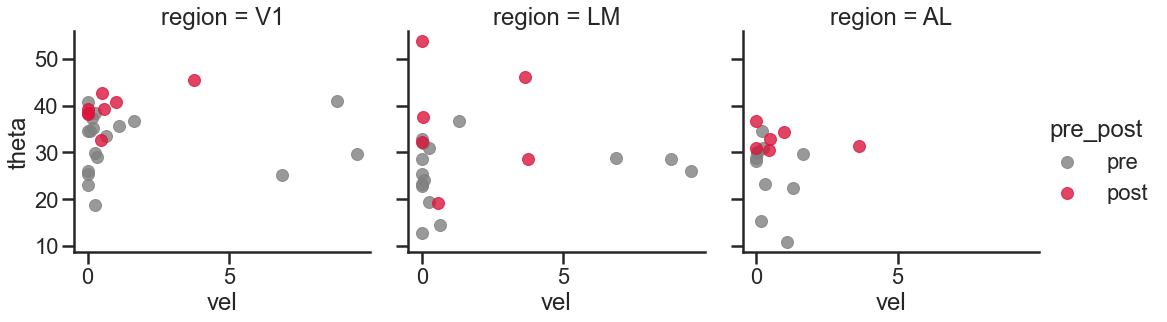

In [525]:
# sns.jointplot(data=toplot2[(toplot2.region=='V1')]
#            ,x='vel',y='theta'
#           ,hue='pre_post'
# #            ,col='region',col_order=['V1','LM','AL']
# #            ,row='tw'
# #            ,row_order=['pre','post']
#           )
sns.lmplot(data=toplot2
           ,x='vel',y='theta'
          ,hue='pre_post'
           ,col='region',col_order=['V1','LM','AL']
           ,fit_reg=False
#            ,row='pre_post',row_order=['pre','post']
          )
# plt.savefig(report_directory+'locomotion/ALtraining_stimvelvstheta_ALparams.png')
# plt.savefig(report_directory+'locomotion/ALtraining_stimvelvstheta_ALparams.pdf')

In [72]:
perctoplot=veldf.groupby(['et','pre_post','sf','tf','loco']
                         ).trial.count().to_frame('count')
perctoplot=perctoplot.groupby(['et','pre_post','sf','tf']
                 ).apply(lambda x:x/x.sum()).reset_index()
# perctoplot

<AxesSubplot:xlabel='sf', ylabel='tf'>

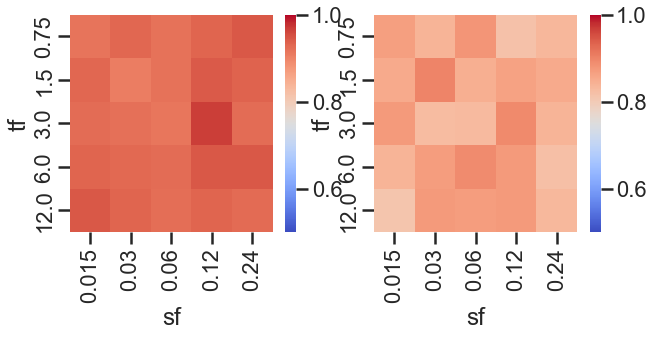

In [125]:
toplot=veldf[~veldf.et.str.contains('|'.join(training_stim['AL']))
            ].groupby(['sf','tf','pre_post']).stimvel.mean().reset_index()
toplot=perctoplot[(perctoplot.loco==0)
                 &(~perctoplot.et.str.contains('|'.join(training_stim['AL'])))
#                   &(~perctoplot.et.str.contains('|'.join(['67','68','61'])))
                 ].groupby(['sf','tf','pre_post'])['count'].mean().reset_index()

# toplot#.pivot('sf','tf','stimvel')
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.heatmap(toplot[toplot.pre_post=='pre'].pivot('tf','sf','count')
           ,cmap='coolwarm',vmin=0.5,vmax=1
            ,ax=ax[0]
           )
sns.heatmap(toplot[toplot.pre_post=='post'].pivot('tf','sf','count')
           ,cmap='coolwarm',vmin=0.5,vmax=1
            ,ax=ax[1]
           )

meta NOT subset; don't know how to subset; dropped


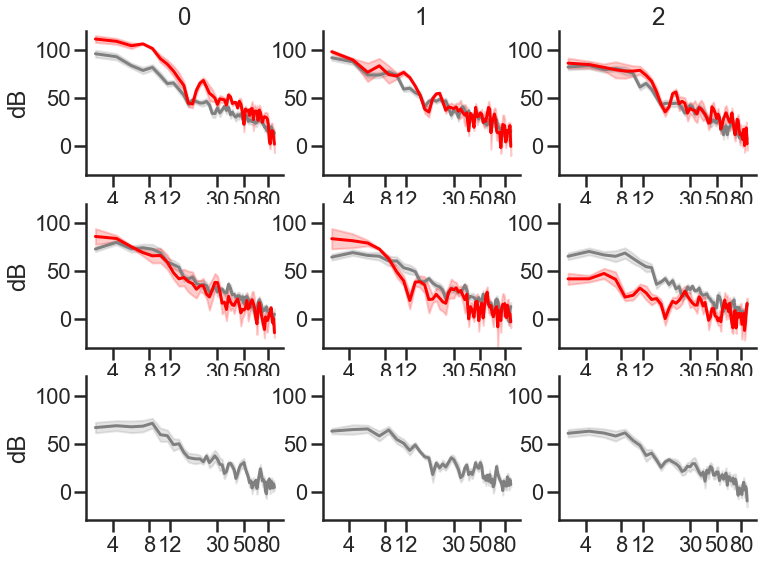

In [229]:
# for n,g in pspecdf.groupby(['region']):
#     print(n)
#     sns.lineplot(x='frex',y='pspec',data=g[g.ly==2],hue='pre_post'
#                  ,estimator=np.mean,ci=68)
#     plt.xlim(0,30)
#     plt.show()
f,ax=plt.subplots(3,3,figsize=(12,9))
# ax.set(xscale="log")

for i,rg in enumerate(['V1','LM','AL']):
    tm1=pspecdf[pspecdf.region==rg]
    for ii,ly in enumerate([0,1,2]):
        tm2=tm1[tm1.ly==ly]
        tmp=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.mean().to_frame('dB').reset_index()
        tmpsem=tm2[tm2.frex.between(2,90)
                 &(tm2.tf==param_r[0])
                  &(tm2.sf==param_r[1])
                 ].groupby(['pre_post','frex']).dB.sem().to_frame('sem').reset_index()
        ax[i][ii].plot(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB,color='gray')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='pre'].frex,tmp[tmp.pre_post=='pre'].dB-tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,tmp[tmp.pre_post=='pre'].dB+tmpsem[tmpsem.pre_post=='pre']['sem']
                         ,color='gray',alpha=0.2)
        ax[i][ii].plot(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB,color='red')
        ax[i][ii].fill_between(tmp[tmp.pre_post=='post'].frex,tmp[tmp.pre_post=='post'].dB-tmpsem[tmpsem.pre_post=='post']['sem']
                         ,tmp[tmp.pre_post=='post'].dB+tmpsem[tmpsem.pre_post=='post']['sem']
                         ,color='red',alpha=0.2)
#         ax[i][ii].set_xlim(0.5,30)
        ax[i][ii].set_ylim(-30,120)
        ax[i][ii].set(xscale="log")
        ax[i][ii].minorticks_off()
        ax[i][ii].set_xticks([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xticklabels([4,8,12,30,50,80])#np.arange(0,50,4)[1:])
        ax[i][ii].set_xlabel('')
        ax[i][ii].set_ylabel('')
        ax[0][ii].set_title(ly)
        ax[i][ii].legend('',frameon=False)
        
#         ax[i][ii].set_xlabel('')
    ax[i][0].set_ylabel('dB')
#     ax[i][0].text(-10,10,rg)
    

sns.despine()
# f.gca().set_xscale('log')

# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdB_ALparams_loco.png')
# plt.savefig(report_directory+'tf/ALtraining_freq500-1200welchdB_ALparams_loco.pdf')
    